import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
data = load_iris()
X  = data.data
y = data.target

In [3]:
ss = ShuffleSplit(n_splits = 1,train_size = 0.5,test_size = 0.5)

In [4]:
clf = linear_model.LogisticRegression()

In [6]:
train_index ,test_index = next(ss.split(X))
X_train,X_test = X[train_index] ,X[test_index]
y_train,y_test = y[train_index],y[test_index]

In [7]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
print(clf.score(X_train,y_train))

0.986666666667


In [9]:
print(clf.score(X_test,y_test))

0.96


In [11]:
ss = ShuffleSplit(n_splits = 10,train_size = 0.5,test_size = 0.5)
scores =[]
for train_index,test_index in ss.split(X):
    X_train,X_test = X[train_index] ,X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)
scores = np.array(scores)
print(scores)

[ 0.92        0.96        0.96        0.8         0.96        0.97333333
  0.84        0.92        0.89333333  0.96      ]


In [12]:
scores.mean()

0.91866666666666674

In [13]:
scores.std()

0.055441661030111437

In [14]:
print("{} +/-{}".format(scores.mean(),scores.std()))

0.9186666666666667 +/-0.05544166103011144


In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [17]:
train_sizes = np.arange(0.1,1.0,0.1)

In [19]:
all_mean = []
all_std = []

for train_size in train_sizes:
    ss = ShuffleSplit(n_splits= 100, train_size = train_size,test_size = 1- train_size)
    scores = []
    for train_index,test_index in ss.split(X):
        X_train,X_test = X[train_index] ,X[test_index]
        y_train,y_test = y[train_index],y[test_index]
        clf.fit(X_train,y_train)
        score = clf.score(X_test,y_test)
        scores.append(score)
    scores = np.array(scores)
    
    all_mean.append(scores.mean()*100)
    all_std.append(scores.std()*100)
        
           

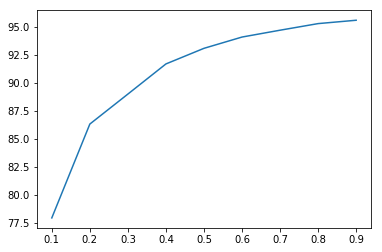

In [20]:
plt.plot(train_sizes,all_mean)

(0, 1)

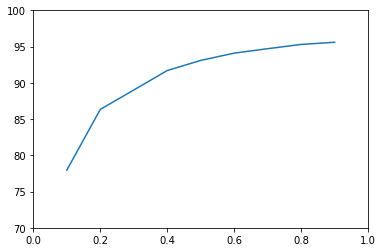

In [21]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)

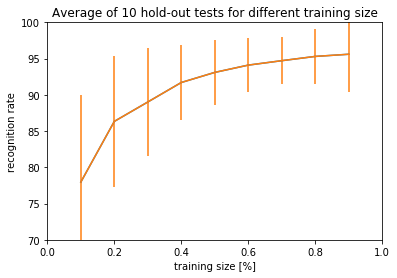

In [22]:
plt.plot(train_sizes, all_mean)
plt.ylim(70,100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")